In [6]:
from PIL import Image, ImageDraw
import numpy as np

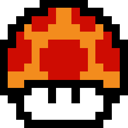

In [52]:
im = Image.open("life.png")
im

In [108]:
def pixMatrix(im):
    w, h = im.size
    pix = np.zeros((w, h, 4))
    for i in range(w):
        for j in range(h):
            pix[i, j] = im.getpixel((i, j))
    return pix

In [54]:
def submatrix(x, depth=0, maxdepth=True):
    if 2**depth <= x.shape[0] and maxdepth:
        scl = int(w/(2**depth))
        return np.array([x[j*scl:(j+1)*scl, i*scl:(i+1)*scl].mean(axis=(0,1)).astype(int)
                      for j in range(2**depth)
                      for i in range(2**depth)]).reshape((2**depth, 2**depth, 4))
    else:
        return x

In [118]:
def draw(file, depth):
    im = Image.open(file)
    pix = pixMatrix(im)
    nm = Image.new('RGBA', (w, h), (255,255,255,0))
    sub = submatrix(pix, depth)
    dr = ImageDraw.Draw(nm)
    n = 2**depth
    print(n)
    for i in range(n):
        for j in range(n):
            dr.rectangle(((i*w/n, j*w/n), ((i+1)*w/n, (j+1)*w/n)), fill=tuple(sub[i,j]))
    return nm

128


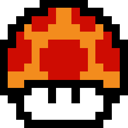

In [124]:
draw("life.png",7)